<a href="https://colab.research.google.com/github/sanjanaaps/FirstAidApp/blob/main/WoundActiveContours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive

In [2]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [8]:
!ls /content/gdrive/MyDrive/Intelligent-first-aid-assistant/Wound_dataset

Abrasions  Bruises  Burns  Cut	Ingrown_nails  Laceration  Stab_wound


In [17]:
ROOT_DIR = "/content/gdrive/MyDrive/Intelligent-first-aid-assistant/Wound_dataset/"

In [9]:
import cv2               as cv
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import time

In [10]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour

array([[[215, 226, 253],
        [215, 226, 253],
        [214, 225, 252],
        ...,
        [ 79,  84, 115],
        [ 79,  82, 113],
        [ 80,  83, 114]],

       [[215, 226, 253],
        [215, 226, 253],
        [214, 225, 252],
        ...,
        [ 76,  81, 112],
        [ 77,  80, 111],
        [ 78,  81, 112]],

       [[216, 227, 254],
        [215, 226, 253],
        [214, 225, 252],
        ...,
        [ 77,  82, 113],
        [ 77,  80, 111],
        [ 79,  82, 113]],

       ...,

       [[ 56,  75, 108],
        [ 57,  76, 109],
        [ 59,  78, 111],
        ...,
        [ 83,  92, 126],
        [ 82,  91, 125],
        [ 81,  90, 124]],

       [[ 56,  75, 108],
        [ 57,  76, 109],
        [ 59,  78, 111],
        ...,
        [ 82,  91, 125],
        [ 82,  91, 125],
        [ 81,  90, 124]],

       [[ 53,  72, 105],
        [ 54,  73, 106],
        [ 57,  76, 109],
        ...,
        [ 82,  91, 125],
        [ 82,  91, 125],
        [ 81,  90, 124]]], dtype=uint8)
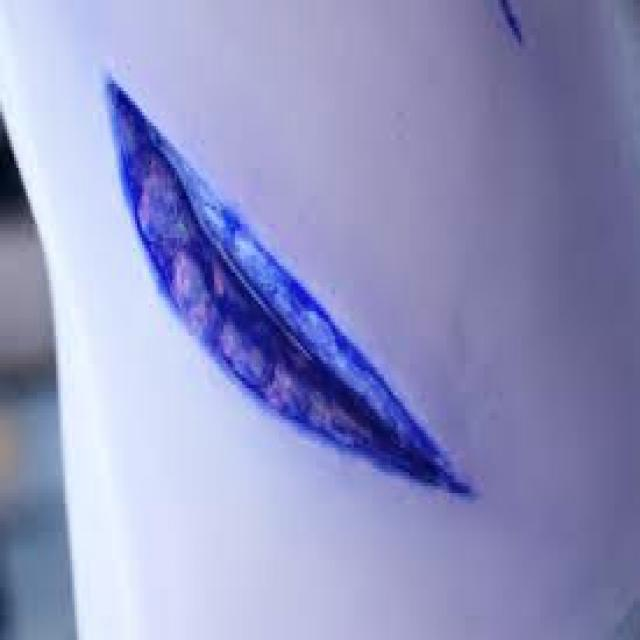

In [64]:
def pick(data, number):
    parent = data.capitalize()
    child = data.lower()
    if parent == 'Ingrown_nails':
        child = 'ingrown_nail'
    if parent == 'Laceration':
        child = 'laseration'
    path = ROOT_DIR + parent + '/' + child + ' (' + str(number) + ').jpg'
    if not os.path.exists(path):
        print('File not found')
    return path

image = cv.imread(pick('cut', 20))
image

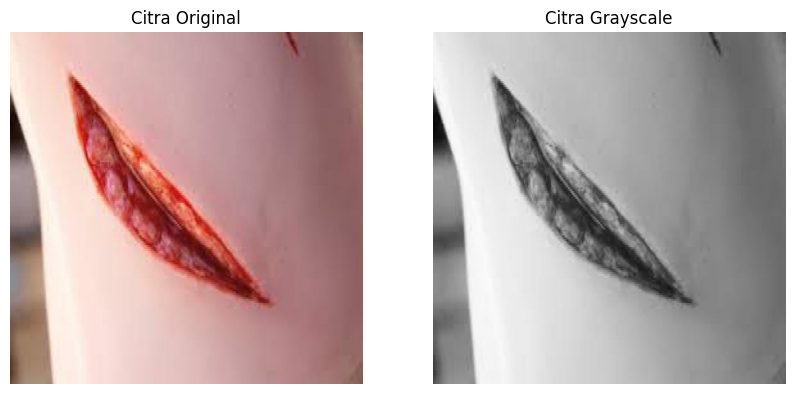

In [57]:
#grayscaling
colored_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].imshow(colored_image)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis('off')
plt.show()

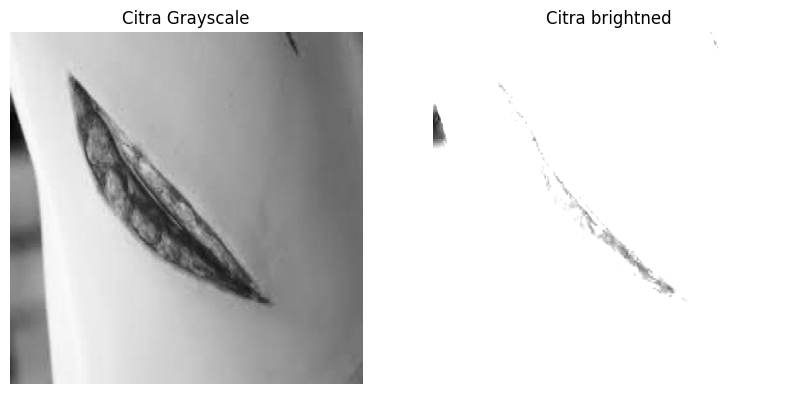

In [60]:
brightness = 200
brightened_image = cv.add(grayscale_image, brightness)
b, g, r = cv.split(colored_image)
redscale_image = cv.merge((np.zeros_like(b), np.zeros_like(g), g))
fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].imshow(grayscale_image,cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis('off')
axes[1].imshow(brightened_image, cmap='gray')
axes[1].set_title("brightned Image")
axes[1].axis('off')
plt.show()

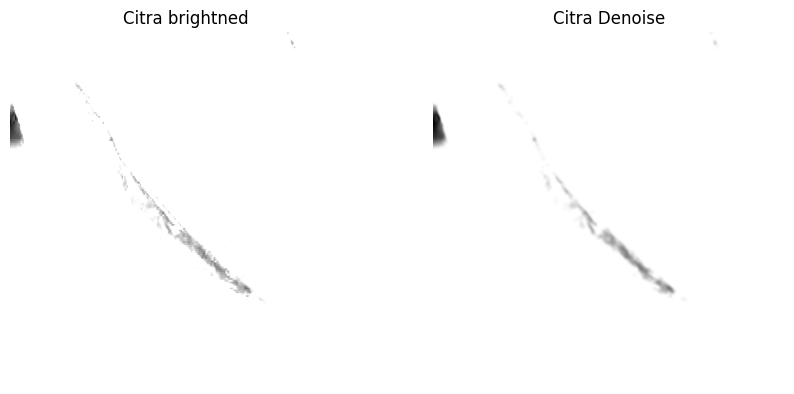

In [35]:
#den
denoised_image = cv.medianBlur(brightened_image, 3)
denoised_image = cv.fastNlMeansDenoising(citra_denoise, None, 10, 10, 7)

fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].imshow(brightened_image, cmap='gray')
axes[0].set_title("brightned image")
axes[0].axis('off')
axes[1].imshow(denoised_image, cmap='gray')
axes[1].set_title("Denoised image")
axes[1].axis('off')
plt.show()

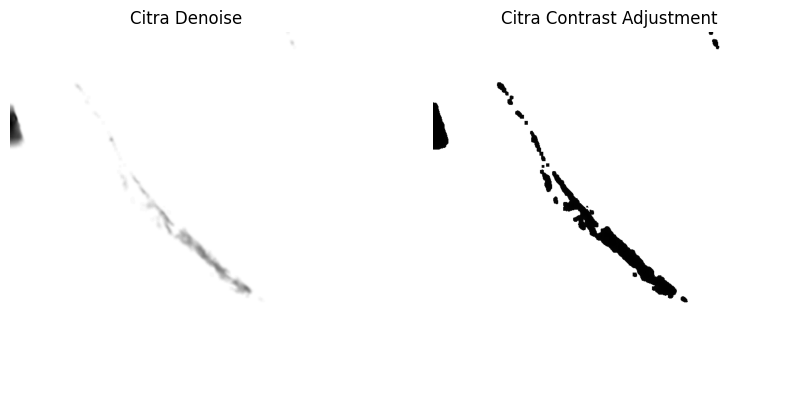

In [36]:
#contrast adjustment
contrast_adjusted_image = cv.equalizeHist(denoise_image)

fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].imshow(denoised_image, cmap='gray')
axes[0].set_title("Denoised image")
axes[0].axis('off')
axes[1].imshow(contrast_adjusted_image, cmap='gray')
axes[1].set_title("Contrast Adjusted image")
axes[1].axis('off')
plt.show()

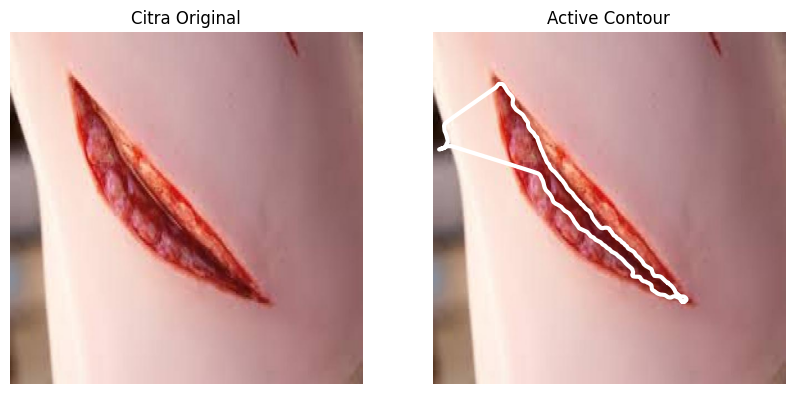

MSE : 106.03568359375
PSNR: 13.938141601601705


In [37]:
#creating active contours
s = np.linspace(0, 2*np.pi, 500)
r = 300 + 300*np.sin(s)
c = 320 + 300*np.cos(s)
init = np.array([r, c]).T

# Segmentasi dengan Active Contour
snake = active_contour(gaussian(contrast_adjusted_image, 3, preserve_range=False),
                       init, alpha=0.01, beta=0, gamma=0.001)

fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].set_title("Original image")
axes[0].imshow(image[...,::-1], cmap='gray')
axes[0].axis('off')
axes[1].imshow(image[...,::-1], cmap='gray')
axes[1].plot(snake[:, 1], snake[:, 0], '-w', lw=3)
axes[1].set_title("Active Contour")
axes[1].axis('off')
plt.show()

selisih = np.array(denoised_image) - np.array(image[:, :, 0])
mse = np.mean(np.square(selisih))
psnr = 10 * np.log10(255 / np.sqrt(mse))
print("MSE :", mse)
print("PSNR:", psnr)

In [77]:
def seg_active_contour(folder, img_number, bright, x, a, y, b):
    image = cv.imread(pick(folder, img_number))
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    brightness = bright
    brightened_image = cv.add(grayscale_image, brightness)
    denoised_image = cv.medianBlur(brightened_image, 3)
    denoised_image = cv.fastNlMeansDenoising(denoised_image, None, 10, 10, 7)
    image_contrast_adjusted = cv.equalizeHist(denoised_image)
    s = np.linspace(0, 2*np.pi, 500)
    r = x + a*np.sin(s)
    c = y + b*np.cos(s)
    init = np.array([r, c]).T
    snake = active_contour(gaussian(image_contrast_adjusted, 3, preserve_range=False),
                           init, alpha=0.01, beta=0, gamma=0.001)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].set_title("Original image")
    axes[0].imshow(image[..., ::-1], cmap='gray')
    axes[0].axis('off')
    axes[1].imshow(image[..., ::-1], cmap='gray')
    axes[1].plot(snake[:, 1], snake[:, 0], '-w', lw=3)
    axes[1].set_title("Image segemetation Active Contour")
    axes[1].axis('off')
    plt.show()
    selisih = np.array(denoised_image) - np.array(image[:, :, 0])
    mse = np.mean(np.square(selisih))
    psnr = 10 * np.log10(255 / np.sqrt(mse))
    print("MSE: ", mse)
    print("PSNR: ", psnr)

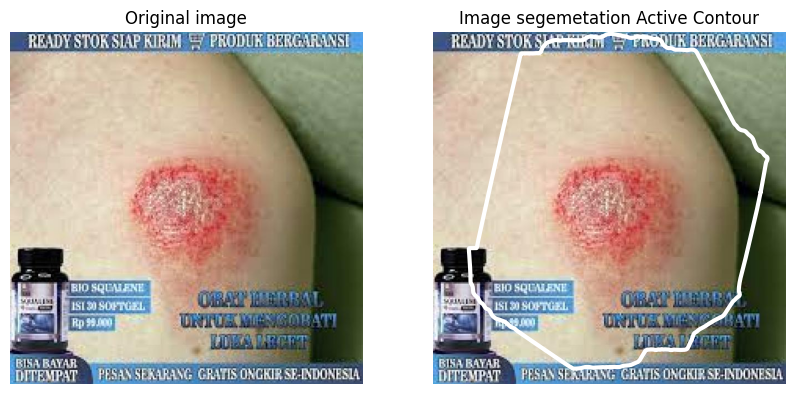

MSE:  105.172001953125
PSNR:  13.955901100289301


In [78]:
seg_active_contour(folder='abrasions', img_number=8, bright=144, x=300, a=300, y=320, b=300)

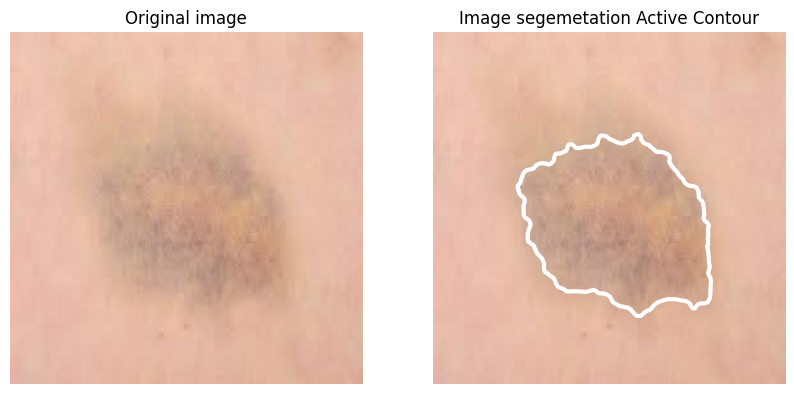

MSE:  120.726689453125
PSNR:  13.656385346111168


KeyboardInterrupt: 

In [79]:
seg_active_contour(folder='bruises', img_number=2, bright=75, x=300, a=300, y=320, b=300)
seg_active_contour(folder='burns', img_number=36, bright=215, x=300, a=300, y=320, b=300)
seg_active_contour(folder='cut', img_number=15, bright=200, x=300, a=300, y=320, b=300)
seg_active_contour(folder='laceration', img_number=15, bright=120, x=300, a=300, y=320, b=300)
seg_active_contour(folder='ingrown_nails', img_number=4, bright=146, x=320, a=150, y=360, b=150)
seg_active_contour(folder='stab_wound', img_number=5, bright=180, x=250, a=200, y=250, b=200)
seg_active_contour(folder='abrasions', img_number=1, bright=140, x=300, a=200, y=320, b=130)

In [80]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [81]:
%%writefile StreamlitApp1.py
import streamlit as st
from PIL import Image
import random

# Function to classify the uploaded image into predefined categories
def classify_image(image):
    categories = ["Bruises", "Burns", "Cuts", "Lacerations", "Ingrown Nails", "Stab Wounds", "Abrasions"]
    # Simulating classification (in a real-world case, you'd use a model here)
    return random.choice(categories)

# Streamlit UI
st.title("Intelligent First Aid Assistant")

st.sidebar.header("How it Works")
st.sidebar.write(
    "Upload an image of the injury, and our AI will classify it into categories like bruises, burns, cuts, and more. ")

# File uploader for the image
uploaded_image = st.file_uploader("Upload an injury image", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    # Display the uploaded image
    image = Image.open(uploaded_image)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Classify the image
    st.write("Analyzing the image...")
    injury_type = classify_image(image)

    # Display classification result
    st.success(f"The injury is classified as: **{injury_type}**")

    # Provide simple responses based on the classification
    st.write("### Suggested First Aid")

    if injury_type == "Bruises":
        st.info("Apply a cold compress to reduce swelling. Avoid putting pressure on the area.")
    elif injury_type == "Burns":
        st.info("Cool the burn under running water for at least 10 minutes. Avoid using ice or ointments.")
    elif injury_type == "Cuts":
        st.info("Clean the wound with water, apply antiseptic, and cover with a sterile bandage.")
    elif injury_type == "Lacerations":
        st.info("Apply firm pressure to stop bleeding. Seek medical attention if the wound is deep.")
    elif injury_type == "Ingrown Nails":
        st.info("Soak the foot in warm water and consider consulting a podiatrist if pain persists.")
    elif injury_type == "Stab Wounds":
        st.info("Do not remove the object (if still present). Apply pressure around the wound and seek emergency medical help.")
    elif injury_type == "Abrasions":
        st.info("Clean the area gently with water. Apply an antibiotic ointment and cover with a sterile dressing.")

st.write("---")
st.write("For more advanced features and expert consultations, explore our premium subscription.")


Writing StreamlitApp1.py


**still under progress**

In [82]:
! wget -q -O - ipv4.icanhazip.com

34.125.106.129


In [83]:
!streamlit run StreamlitApp1.py &>/content/logs.txt &

In [87]:
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧your url is: https://puny-crews-arrive.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:18435 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:517:28)
    at emitErrorNT (node:internal/streams/destroy:151:8)
    at emitErrorCloseNT (node:internal/streams/destroy:116:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v18.20.5
⠙